# <center>Quality/Complexity of Computer Science Programs</center>

<center>
    <b>Hayden W. Free,$^\dagger$ Johnny Flynn,$^\dagger$ Camden Mackowiak,$^\dagger$ Gregory L. Heileman$^\ddagger$, Jerzy Jaromczyk$^\dagger$ and Chaouki T. Abdallah$^\star$</b> <br>
    $^\dagger$Department of Computer Science <br>
    University of Kentucky <br>
    {hayden.free, john.flynn, camden.mackowiak,jurek}@uky.edu <br>
    $^\ddagger$Department of Electrical & Computer Engineering <br>
    Univeristy of Arizona <br>
    heileman@arizona.edu <br>
    $^\star$Department of Electrical & Computer Engineering <br>
    Georgia Institute of Technology <br>
    ctabdallah@gatech.edu  <br>
</center>

## Introduction
In this notebook we compare the complexity of computer science undergraduate programs across the ranking provided by the CSRankings.org <cite data-cite="be:19">Berger (2019)</cite> 

This analysis is based upon recently developed curricular complexity metrics (see <cite data-cite="he:18">Heileman, et. al, (2018)</cite>).  Research in this area demonstrates that according to these complexity metrics, STEM programs tend to be among the most complex univeristy curricula. This is attributed to the large number of prerequisites that accompany many of the courses in STEM programs, as well as the long prerequisite chains that tend to exist in these curricula. This notebook makes use use of a Curricular Analytics toolbox that was built to compute these curricular complexity metrics <cite data-cite="he:18">Heileman, et. al. (2019)</cite>).    

The following Julia packages are needed for this analyisis:

In [1]:
########## use this to run CA locally
using Pkg
if split(pwd(),Base.Filesystem.path_separator)[end] != "CurricularAnalytics.jl"
    cd("../../../CurricularAnalytics.jl/")
end
pkg"activate ."
cd("../CA-Notebooks/Quality-Complexity/Computer Science")
############
using CurricularAnalytics
using Glob
using CSV
using DataFrames
using Statistics
using StatsPlots

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6091665738741448923\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14726309718315334615\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6091665738741448923\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

## Complexity of Computer Science Curricula
To get a sense of the diversity in the complexities of undergraduate computer science program curricula, below we provide  visulizations of a few computer science programs.

In [2]:
curric = read_csv("./tier_top/Carnegie_Mellon-CS.csv")
visualize(curric, notebook=true)

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":true,\"edit\":false},\"curriculum\":{\"name\":\"Computer Science\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"15 151\",\"metrics\":{},\"nameSub\":\"Mathematical Foundations for Computer Science\",\"id\":4,\"credits\":3.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"15 122\",\"metrics\":{},\"nameSub\":\"Principles of Imperative Computation\",\"id\":2,\"credits\":3.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"21 120\",\"metrics\":{},\"nameSub\":\"Differential and Integral Calculus\",\"id\":5,\"credits\":3.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"7 128\",\"metrics\":{},\"nameSub\":\"Freshmman Immigration Course\",\"id\":1,\"credits\":0.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"15 131\",\"metrics\":{},\"nameSub\":\"Great Practical Ideas for Computer Scientists\",\"id\":3,\"credits\":0.67,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"76 101\",\"metrics\":{},\"nameSub\":\"Interpretation and Argument\",\"id\":6,\"credits\":3.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"99 101\",\"metrics\":{},\"nameSub\":\"Computing @ Carnegie Mellon\",\"id\":7,\"credits\":1.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Science/Engineering Course\",\"id\":11,\"credits\":3.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Humanities and Arts Elective\",\"id\":12,\"credits\":3.0,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":8,\"type\":\"prereq\"}],\"name\":\"15 150\",\"metrics\":{},\"nameSub\":\"Principles of Functional Programming\",\"id\":8,\"credits\":3.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":5,\"target_id\":10,\"type\":\"prereq\"}],\"name\":\"21 122\",\"metrics\":{},\"nameSub\":\"Integration and Approximation\",\"id\":10,\"credits\":3.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"15 213\",\"metrics\":{},\"nameSub\":\"Introduction to Computer Systems\",\"id\":13,\"credits\":4.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"21 241\",\"metrics\":{},\"nameSub\":\"Matrices and Linear Transformations\",\"id\":14,\"credits\":3.33,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Science/Engineering Course\",\"id\":15,\"credits\":3.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Humanities and Arts Elective\",\"id\":16,\"credits\":3.0,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":4,\"target_id\":9,\"type\":\"prereq\"},{\"source_id\":2,\"target_id\":9,\"type\":\"prereq\"},{\"source_id\":8,\"target_id\":9,\"type\":\"prereq\"}],\"name\":\"15 251\",\"metrics\":{},\"nameSub\":\"Great Ideas in Theoretical Computer Science\",\"id\":9,\"credits\":4.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":18,\"type\":\"prereq\"},{\"source_id\":8,\"target_id\":18,\"type\":\"prereq\"}],\"name\":\"15 210\",\"metrics\":{},\"nameSub\":\"Parallel and Sequential Data Structures and Algorithms\",\"id\":18,\"credits\":4.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Minor Requirement / Free Elective\",\"id\":17,\"credits\":3.0,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Computer Science: Domains Elective\",\"

In [3]:
dp = read_csv("./tier_middle/University_of_Colorado_Colorado_Springs-CS.csv")
visualize(dp, notebook=true)

WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[""], Dict{Symbol,Any}(:src=>"http://localhost:8156",:id=>"curriculum",:events=>Dict(:load=>JSString("(function (){this.contentWindow.postMessage({\"options\":{\"hideTerms\":true,\"edit\":false},\"curriculum\":{\"name\":\"Computer Science\",\"dp_name\":\"\",\"curriculum_terms\":[{\"name\":\"Term 1\",\"curriculum_items\":[{\"curriculum_requisites\":[],\"name\":\"CS 1150\",\"metrics\":{},\"nameSub\":\"Principles of Computer Science\",\"id\":1,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"MATH 1350\",\"metrics\":{},\"nameSub\":\"Calculus I\",\"id\":21,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":21,\"target_id\":27,\"type\":\"coreq\"}],\"name\":\"PES 1110\",\"metrics\":{},\"nameSub\":\"General Physics I\",\"id\":27,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\"ENGL 1310\",\"metrics\":{},\"nameSub\":\"Rhetoric & Writing\",\"id\":31,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":27,\"target_id\":29,\"type\":\"coreq\"}],\"name\":\"PES 1160\",\"metrics\":{},\"nameSub\":\"General Physics Lab\",\"id\":29,\"credits\":1,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Computer Science Electives\",\"id\":15,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Computer Science Electives\",\"id\":16,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":1},{\"name\":\"Term 2\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":2,\"type\":\"prereq\"}],\"name\":\"CS 1450\",\"metrics\":{},\"nameSub\":\"Data Structures & Algorithms\",\"id\":2,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":1,\"target_id\":3,\"type\":\"prereq\"}],\"name\":\"CS 2060\",\"metrics\":{},\"nameSub\":\"Programming in C\",\"id\":3,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":21,\"target_id\":22,\"type\":\"prereq\"}],\"name\":\"MATH 1360\",\"metrics\":{},\"nameSub\":\"Calculus II\",\"id\":22,\"credits\":4,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":21,\"target_id\":23,\"type\":\"prereq\"}],\"name\":\"MATH 2150\",\"metrics\":{},\"nameSub\":\"Discrete Mathematics\",\"id\":23,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":21,\"target_id\":25,\"type\":\"prereq\"}],\"name\":\"MATH 3130\",\"metrics\":{},\"nameSub\":\"Intro. to Linear Algebra\",\"id\":25,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":31,\"target_id\":32,\"type\":\"prereq\"}],\"name\":\"ENGL 2090\",\"metrics\":{},\"nameSub\":\"Technical Writing & Presentation\",\"id\":32,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[],\"name\":\" \",\"metrics\":{},\"nameSub\":\"Computer Science Electives\",\"id\":17,\"credits\":3,\"nameCanonical\":\"\"}],\"id\":2},{\"name\":\"Term 3\",\"curriculum_items\":[{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":4,\"type\":\"prereq\"}],\"name\":\"CS 2080\",\"metrics\":{},\"nameSub\":\"Programming with UNIX\",\"id\":4,\"credits\":2,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":2,\"target_id\":5,\"type\":\"prereq\"},{\"source_id\":3,\"target_id\":5,\"type\":\"prereq\"}],\"name\":\"CS 2160\",\"metrics\":{},\"nameSub\":\"Computer Org. & Assembly Language\",\"id\":5,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":23,\"target_id\":13,\"type\":\"prereq\"},{\"source_id\":25,\"target_id\":13,\"type\":\"prereq\"}],\"name\":\"CS 4700\",\"metrics\":{},\"nameSub\":\"Computability, Automata & Formal Lang\",\"id\":13,\"credits\":3,\"nameCanonical\":\"\"},{\"curriculum_requisites\":[{\"source_id\":22,\"target_id\":24,\"type\":\"prereq\"}],\"name\":\"MATH 2350\",\"metrics\":{},\"nameSub\":\"Calculus III\",\"id\":24,\"credits\":4,\"nameCanoni

By hovering your mouse over the courses in these degree plans, you can view the contribution that various courses make to the overall compleixty of a curriculum.

## Methology
In this study we used the rankings provided by the CSRankings of Computer Science departments as a proxy for program quality.  That is, for the purpose of this study, we assume that the highest ranked computer science departments are synonymous with the highest quality computer science undergraduate programs.  We acknowledge the concerns that are routinely expressed concerning these rankings such as these~\cite{}.  However, it should be noted that this study uses aggregations of schools with tiers, and the statistics associated with the aggregations.  Thus, the specific rankings of the schools within the tiers are irrelevant, all that matters is the tier in which a school is placed. Upon inspection of the schools within each tier, we believe that knowledgable and impartial observes would agree that the three tiers constructed in this study are highly correlated with the program quality.

## Experimental Design
The question of interest in this study is whether or not curricular complexity is related to program quality. In order to answer this question, we constructed an analysis of variance~(ANOVA) experiment that involved partitioning the schools in the CSRanking list according to their decile within the ranking. From these three groups were created as follows. A *top tier* of schools defined as those in the first decile of the ranking.  A *middle tier*, defined as the set of schools in the fifth and sixth deciles of the ranking that are equidistant from first to last ranked schools. A *bottom tier* of schools comprised of the schools ranked in the bottom two deciles. The null hypothesis is:

    "There is no difference between the mean values of the curricular complexities of those schools belonging 
     to the top, middle and bottom tiers." 

The alternative hypothesis is then: 

    "At least one of the curricular complexity mean values of a school tier differs significantly from the 
     means of the other two tiers."
     
Histograms showing the curricular complexity distributions for the random samples drawn from each of the three tiers are shown below.

In [4]:
tier_top_files = glob("*", "tier_top")
tier_middle_files = glob("*", "tier_middle")
tier_bottom_files = glob("*", "tier_bottom")
files = vcat(tier_top_files, tier_middle_files, tier_bottom_files)

curriculum = Dict{String, Curriculum}()
for csv_filepath in files
    curric = read_csv(csv_filepath)
#    if (typeof(curric) == DegreePlan)
#        println("Whoa: $(curric.name) is a degree plan")
#    end
#    println("Processing $(curric.institution)")
    complexity(curric)
    curriculum[csv_filepath] = curric
end

Carnegie_Mellon-CS => 61.0
Stanford-CS => 76.20000000000006
Texas_A&M-CS => 136.0
Rutgers_University-CS => 84.0
Northeastern_University-CS => 88.0
University_of_Southern_California-CS => 111.0
New_York_University-CS => 96.0
Purdue_University-CS => 106.0
University_of_Pennsylvania-CS => 91.0


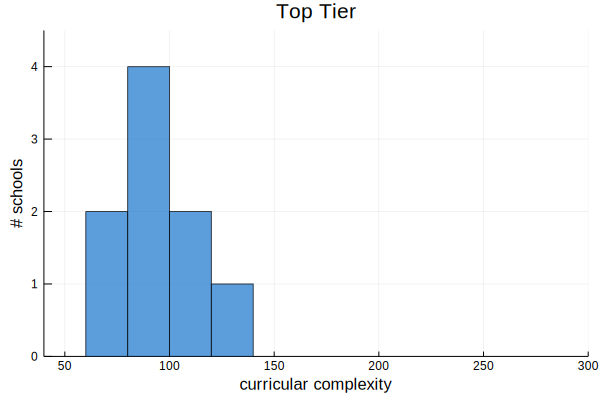

In [5]:
top_tier = Array{Curriculum,1}()
top_tier_total_cc = 0
top_tier_avg_cc = 0
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_top"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(top_tier, val)
        top_tier_total_cc = top_tier_total_cc + val.metrics["complexity"][1]
    end
    top_tier_avg_cc = top_tier_total_cc / length(top_tier)
end
metric_histogram(top_tier, "complexity", nbins=5, title="Top Tier", xlabel="curricular complexity", ylabel="# schools", xlim=(40,300))

Process the schools in top tier, extracting the curricular complexity scores:

Process the schools in the middle tier, extracting the curricular complexity metrics:

University_of_North_Carolina_Charlotte-CS => 93.0
University_of_Connecticut-CS => 126.0
University_of_Iowa-CS => 60.0
Clemson_University-CS => 123.0
University_of_Arizona-CS => 108.0
Iowa-State-University-CS => 149.0
University_of_Massachusetts_Lowell-CS => 216.0
Rochester_Institute_Technology-CS => 150.0
Illinois_Tech-CS => 87.80000000000003
Drexel-CS => 180.19999999999987
South_Florida-CS => 250.0
Tennessee_CS => 169.0
University_of_Georgia-CS => 77.0
University_of_Kentucky-CS => 144.0
New_Hampshire-CS => 123.0
University_of_Colorado_Colorado_Springs-CS => 201.0
University_of_Maryland_Baltimore_County-CS => 133.0
University_of_Houston-CS => 184.0
Virginia_Commonwealth_University-CS => 161.0


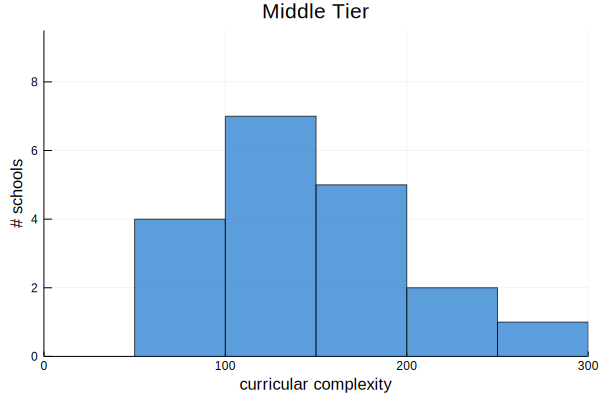

In [6]:
middle_tier = Array{Curriculum,1}()
middle_tier_total_cc = 0
middle_tier_avg_cc = 0
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_middle"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(middle_tier, val)
        middle_tier_total_cc = middle_tier_total_cc + val.metrics["complexity"][1]
    end
    middle_tier_avg_cc = middle_tier_total_cc / length(middle_tier)
end
metric_histogram(middle_tier, "complexity", nbins=5, title="Middle Tier", xlabel="curricular complexity", ylabel="# schools", xlim=(0,300))

Process the schools in the bottom tier, extracting their curricular complexity scores:

University_of_Michigan-Dearborn-CS => 167.0
University_of_Oklahoma-CS => 162.0
Missouri_University_of_Science_and_Technology-CS => 136.0
University_of_Missouri-CS => 173.0
Montana_State-CS => 105.0
North_Dakota_State-CS => 152.0
University_of_Arkansas-Little_Rock-CS => 146.0
University_of_Miami-CS => 142.0
Nova_Southeastern_University-CS => 122.0
Mississippi_State-CS => 165.0
University_of_Nebraska-Omaha-CS => 188.0
Boston_College-CS => 74.0
Boise_State_University-CS => 269.0
Texas_Tech_University-CS => 256.0
Georgia_State-CS => 165.0
University_of_Tulsa-CS => 145.0
New_Mexico_Institute_of_Mining_and_Technology-CS => 270.0
Wyoming-CS => 174.0
University_of_Wisconsin-Milwaukee-CS => 143.0
UNLV-CS => 211.0


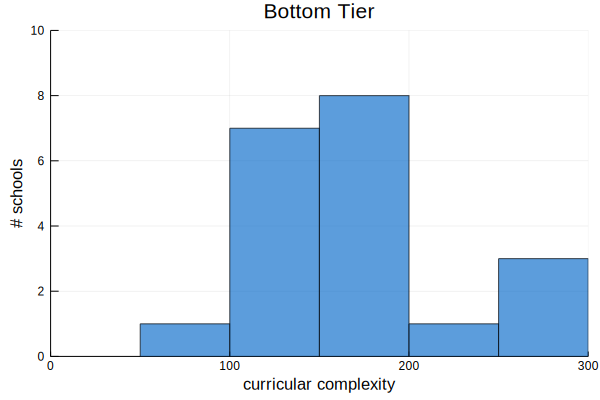

In [7]:
bottom_tier = Array{Curriculum,1}()
bottom_tier_total_cc = 0
bottom_tier_avg_cc = 0
for (key, val) in curriculum
    if (split(key, "/")[1]) == "tier_bottom"
        name = split(split(key, "/")[2], ".")[1]
        println("$name => $(val.metrics["complexity"][1])")
        push!(bottom_tier, val)
        bottom_tier_total_cc = bottom_tier_total_cc + val.metrics["complexity"][1]
    end
    bottom_tier_avg_cc = bottom_tier_total_cc / length(bottom_tier)
end
metric_histogram(bottom_tier, "complexity", nbins=5, title="Bottom Tier", xlabel="curricular complexity", ylabel="# schools", xlim=(0,300))

A box-and-whisker diagram for each of the three samples, provided below, shows the differences between the various statistics associated with these samples.  The quesion we will answer using ANOVA anlaysis is whether or not these variances are statistically significant across these three tiers.

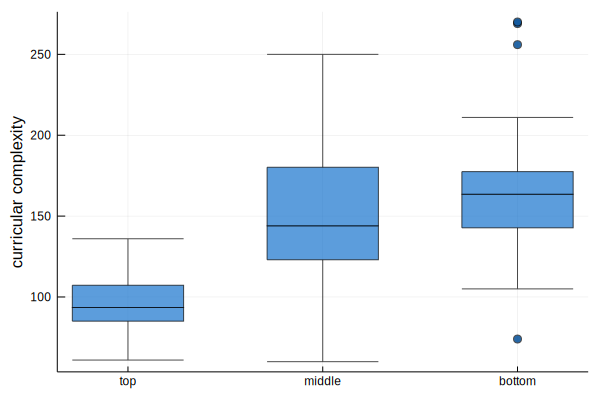

In [8]:
metric_boxplot(["top" "middle" "bottom"], [top_tier, middle_tier, bottom_tier], "complexity", ylabel="curricular complexity")

## ANOVA Analysis

The ANOVA analysis involves random sampling of schools within each of the three tiers. In order to ensure the analysis is able to distinguish between actual curricular complexity differences among the tiers, and random variation, sufficient sample sizes must be determined. Under the assumption that the curricular complexity distributions within the tiers are approximately normal, with variance $\sigma^2$, the number of samples that should be selected from each tier is given by
\begin{equation}
 n = \left({\sigma Z \over E}\right)^2,
\end{equation}
where $Z$ is the confidence interval expressed using deviation within the standard normal distribution, and $E$ is the margin of error. To obtain an estimate of $\sigma$, pilot samples from each of the three tiers were taken, yielding the estimate $\hat{\sigma} = 90$. For a 95\% confidence interval, which corresponds to $Z = 1.96$, the margin of error will be 40 curricular complexity points, i.e., 20 points on either side of the mean for a tier. Using these values in the equation provided above leads to sample sizes of $n_1 = n_2 = n_3 = 20$, where $n_1, n_2$ and $n_3$ are the sample sizes for the top, medium and bottom tiers, respectively. Thus, by sampling at least 20 schools from each tier, we can have 95\% confidence that the error in this analysis will be by no more than 40 curricular complexity points.

In order to test the null hypothesis using ANOVA, we must assume the curricular complexity values of the schools within each tier are normally distributed, and that all three tiers have the same variance $\sigma^2$. It should be noted that these conditions can be moderately relaxed (particularly the normality assumption) and the analysis will remain valid \cite{MeScWa:81}. 

The ANOVA method partitions the total sum of squares of the deviations in curricular complexity across all schools into two independent parts, one that is attributed to the independent variable (program quality in this case), and a remainder that is attributed to random errors arising from other factors not accounted for in this experiment. That is,
\begin{equation}
 TSS = SST + SSE,
\end{equation}
where $TSS$ denotes the total sum of squares of deviations, $SST$ represents the sum of squares of the deviations between the tiers, and SSE is the sum of squares attributed to errors or noise. More specifically, if we let $cc_{ij}$ denote the curricular complexity of the $j$\nth school sampled from the $i$-th tier, then
\begin{equation}
 TSS = \sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \overline{cc}\right)^2,
\end{equation}
where $\overline{cc}$ is the sample mean for all samples drawn over all tiers.  The sum of squares deviation between the tiers is given by 
\begin{equation}
 SST = \sum_{i=1}^3 n_i\left(\overline{T}_i - \overline{cc}\right)^2,
\end{equation}
where $T_i$ is the total curricular complexity of the schools sampled from the $i$-th tier, and $\overline{T}_i = T_i/n_i, i = 1,2,3$, are the tier sample averages.
Note that when the sample means for the three tiers are the same, $SST=0$.

Substituting the TSS and SST equations provided above into $TSS = SST + SSE$, and solving for $SSE$ yields:
\begin{equation}
 SSE = {\sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \bar{T}_i\right)^2}.
\end{equation}

The unbiased estimator of $\sigma^2$ based on $n - 3$ degrees of freedom is given by the mean square error,
\begin{equation}
 MSE = {SSE \over n - 3},
\end{equation}
where $n = n_1 + n_2 + n_3$.

The mean square for the tiers has 2 degrees of freedom, i.e., one less than the number of tiers, and is therefore
\begin{equation}
 MST = {SST \over 2}. 
\end{equation}

In order to assess the statistical significance of a decision to reject the null hypothesis, an $F$-test is conducted to compare the deviation among the tier variances.  The $F$-test statistic is given by
\[
 F = {MST \over MSE}.
\] 
Note that the $F$-test is a ratio that compares the mean square variability between the tiers to the mean square variability within the tiers. Thus, as $F$-test values increase above $1$, the data are increasingly inconsistent with the null hypothesis, and the null hypothesis should be rejected when $F > F_{\alpha}$,
where $F_{\alpha}$ is the critical value of $F$ where the probability of a type I error is $\alpha$.

For the $F$ distribution with $(2, 60)$ degrees of freedom, $F_{0.05} = 3.15$.  That is, if the $F$-test for the experiment yields a value greater than $3.15$, we can reject the null hypothesis with only a 5\% chance of doing so in error.

Let $n_1, n_2$ and $n_3$ be the sample sizes drawn from top, middle and bottom tier schools, respectively, with $n = n_1 + n_2 + n_3$.

In [9]:
n_1 = length(top_tier)
n_2 = length(middle_tier)
n_3 = length(bottom_tier)

n = n_1 + n_2 + n_3

45

\begin{equation}
 TSS = \sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \overline{cc}\right)^2
\end{equation}

where $TSS$ denotes the total sum of squares of deviations, and $\overline{cc}$ is the sample mean for all samples drawn over all tiers.

In [10]:
cc_bar = (top_tier_total_cc + middle_tier_total_cc + bottom_tier_total_cc) / n 
TSS = 0.0
for curric in values(top_tier)
    cc_ij = curric.metrics["complexity"][1]
    TSS += (cc_ij - cc_bar)^2
end
for curric in values(middle_tier)
    cc_ij = curric.metrics["complexity"][1]
    TSS += (cc_ij - cc_bar)^2
end
for curric in values(bottom_tier)
    cc_ij = curric.metrics["complexity"][1]
    TSS += (cc_ij - cc_bar)^2
end
TSS = round(TSS, digits=2)

123530.2

\begin{equation}
 TSS = SST + SSE
\end{equation}
where $SST$ represents the sum of squares of the deviations between the tiers, and SSE is the sum of squares attributed to errors or noise. SST can be calculated as: 
\begin{equation}
 SST = \sum_{i=1}^3 n_i\left(\overline{T}_i - \overline{cc}\right)^2
\end{equation}
where $T_i$ is the total curricular complexity of the schools sampled from the $i$-th tier, and $\overline{T}_i = T_i/n_i, i = 1,2,3$, are the tier sample averages.

In [15]:
SST = round(n_1 * (top_tier_avg_cc - cc_bar)^2 + 
            n_2 * (middle_tier_avg_cc - cc_bar)^2 + 
            n_3 * (bottom_tier_avg_cc - cc_bar)^2, digits=2)

30144.57

The value of SSE can be calculated as: 
\begin{equation}
 SSE = {\sum_{i=1}^3 \sum_{j=1}^{n_i} \left(cc_{ij} - \bar{T}_i\right)^2}
\end{equation}

In [16]:
SSE = 0.0
for curric in values(top_tier)
    cc_ij = curric.metrics["complexity"][1]
    SSE += (cc_ij - top_tier_avg_cc)^2
end
for curric in values(middle_tier)
    cc_ij = curric.metrics["complexity"][1]
    SSE += (cc_ij - middle_tier_avg_cc)^2
end
for curric in values(bottom_tier)
    cc_ij = curric.metrics["complexity"][1]
    SSE += (cc_ij - bottom_tier_avg_cc)^2
end
SSE = round(SSE, digits=2)
println(SST)
println(SSE)
println(SST+SSE)

30144.57
93385.63
123530.20000000001


\begin{equation}
 MSE = {SSE \over n - 3}
\end{equation}

In [17]:
MSE = round(SSE/(n-3), digits=2)

2223.47

\begin{equation}
 MST = {SST \over 2}
\end{equation}

In [18]:
MST = round(SST/2, digits=2)

15072.28

The $F$-test statistic is given by
\begin{equation}
F = {MST \over MSE}
\end{equation}

In [19]:
F = round(MST/MSE, digits=2)

6.78

The results of the ANOVA analysis associated with the samples selected from the three tiers of schools are shown below. 

In [20]:
println("\t   SS\t\tdf\t\t  MS\t\t F")
println("\t-----------------------------------------------------")
println("Tiers  | $SST\t2\t\t$MST\t$F")
println("Error  | $SSE\t$(n-3)\t\t$MSE")
println("Totals | $(SST+SSE)\t$(n-1)")

	   SS		df		  MS		 F
	-----------------------------------------------------
Tiers  | 30144.57	2		15072.28	6.78
Error  | 93385.63	42		2223.47
Totals | 123530.20000000001	44


Notice that the $F$-test statistic obtained from this analysis is $6.78$.  Because
\begin{equation}
  6.78 > F_{0.05} = 3.15,
\end{equation}
the null hypothesis should be rejected.  That is, with a low probability of error, the samples collected from each tier indicate that the mean curricular complexity values of the tiers are different.  This result, along with the evidence given in histograms and box-and-whisker diagram, provide strong evidence that higher quality undergraduate computer science programs have lower curricular complexity, and that lower quality undergraduate computer science programs have higher curricular complexity.  

## Conclusions
We have demonstrated that an inverse relationship exists between the complexity of the curricula in undergraduate computer science programs and the quality of these programs. Specifically, the complexity of the computer science undergraduate curricula at the highest quality schools (where quality is inferred from the rankings of computer science departments) is drastically less than the complexity of the curricula at those schools judged to be at the lower end of this quality ranking. The average complexity of those schools at the bottom of the ranking is almost twice the average of those schools in the top decile of the ranking. In addition, we demonstrated that this difference is statistically significant; that is, this difference is due to something other than chance. Because the complexity of a curriculum is a measure of the difficulty that students are expected to have completing that curriculum, this difference has important student success implications. In particular, if we were to equalize instructional factors (e.g., the difficulty of the courses in the curriculum, the support services provided to students, etc.) and student background preparation, we would expect students to graduate at a higher rate from the lower complexity curricula. This is indeed what we observe, and the fact that this benefit is most pronounced in the highest quality programs deserves further investigation. It is possible to produce arguments for both sides of a possible cause-and-effect relationship between curricular complexity and program quality.  Below we consider a few.

One might argue that because the top tier schools admit better prepared students they can offer less complex curricula, as their students can more easily overcome any knowledge gaps that may exist due to having fewer prerequisites prior to attempting a given course, as well as fewer total courses in their curricula. It should be noted, however, that there are a number of schools outside the tier that have created pathways in the first year of their curricula that substantially reduce curricular complexity \cite{HeHiSlAb:17}. These curricular innovations have been demonstrated to significantly improve graduation rates, as well as the attainment of program learning outcomes \cite{KlBo:15}. That is, we belileve is possible to reduce the complexity of computer science programs that serve less-prepared students, while actually improving program quality (as judged by outcomes). More generally, we note that the principle of Occam's razor is often applied to guide engineering designs towards the simplest and therefore best solutions.  One of the most popular versions of this principle states, "Entities are not to be multiplied without necessity."  We posit that this study indicates this principle applies to curricula.  Namely, the simplest curriculum (in terms of complexity) that allows students to attain a program's learning outcomes yields the best student success outcomes and therefore the highest quality program.

## References

Emery Berger (2019).  https://CSRankings.org, accessed August 28, 2019.

Heileman, G. L., Abdallah, C.T., Slim, A., and Hickman, M. (2018). Curricular analytics: A framework for quantifying the impact of curricular reforms and pedagogical innovations. www.arXiv.org, arXiv:1811.09676 [cs.CY].

Heileman, G. L., Free, H. W., Abar, O. and Thompson-Arjona, W. G, (2019). CurricularAnalytics.jl Toolbox. https://github.com/heileman/CurricularAnalytics.jl.